Initial data shape: (690, 16)
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 Class
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0     +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560     +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824     +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3     +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0     +

Missing values before imputation:
 A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

Missing values after imputation:
 A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
Class    0
dtype: int64

Data sample after encoding:
   A1     A2     A3  A4  A

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 - 4s - 307ms/step - accuracy: 0.5420 - loss: 1.0363 - val_accuracy: 0.4234 - val_loss: 0.7546
Epoch 2/50
14/14 - 0s - 23ms/step - accuracy: 0.4898 - loss: 0.7911 - val_accuracy: 0.4595 - val_loss: 0.7021
Epoch 3/50
14/14 - 0s - 21ms/step - accuracy: 0.5782 - loss: 0.6965 - val_accuracy: 0.6847 - val_loss: 0.6213
Epoch 4/50
14/14 - 0s - 8ms/step - accuracy: 0.5941 - loss: 0.6613 - val_accuracy: 0.7748 - val_loss: 0.5793
Epoch 5/50
14/14 - 0s - 13ms/step - accuracy: 0.6463 - loss: 0.6365 - val_accuracy: 0.7928 - val_loss: 0.5554
Epoch 6/50
14/14 - 0s - 21ms/step - accuracy: 0.6644 - loss: 0.6173 - val_accuracy: 0.8198 - val_loss: 0.5390
Epoch 7/50
14/14 - 0s - 20ms/step - accuracy: 0.7143 - loss: 0.5915 - val_accuracy: 0.8559 - val_loss: 0.5110
Epoch 8/50
14/14 - 0s - 9ms/step - accuracy: 0.7075 - loss: 0.5822 - val_accuracy: 0.8559 - val_loss: 0.4930
Epoch 9/50
14/14 - 0s - 8ms/step - accuracy: 0.7256 - loss: 0.5564 - val_accuracy: 0.8468 - val_loss: 0.4746
Epoch 10/50


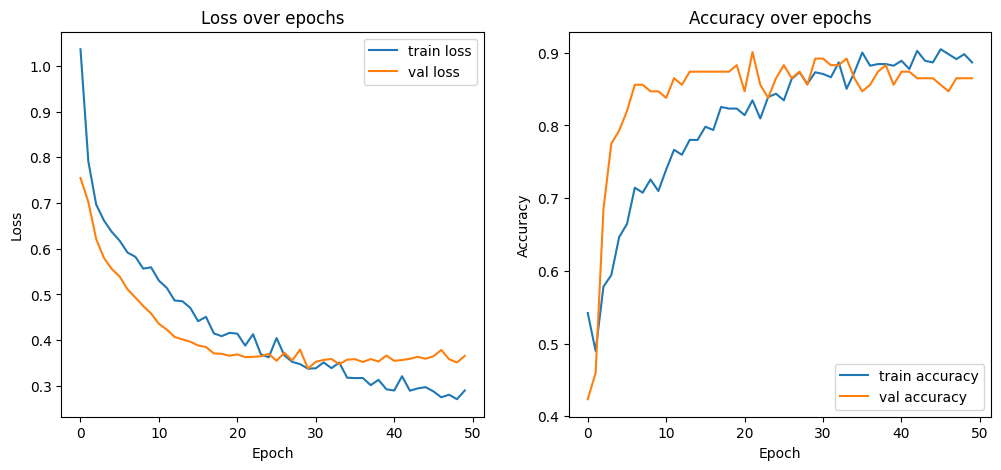

In [1]:
# Install TensorFlow if not already installed (Colab usually has it)
# !pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Class']
data = pd.read_csv(url, names=columns, na_values='?')

print("Initial data shape:", data.shape)
print(data.head())

# Step 2: Check missing values
print("\nMissing values before imputation:\n", data.isna().sum())

# Step 3: Handle missing values
categorical_cols = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']
numerical_cols = list(set(data.columns) - set(categorical_cols) - {'Class'})

cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

print("\nMissing values after imputation:\n", data.isna().sum())

# Step 4: Encode categorical columns and target
le = LabelEncoder()
for col in categorical_cols + ['Class']:
    data[col] = le.fit_transform(data[col])

print("\nData sample after encoding:")
print(data.head())

# Step 5: Split into features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Step 6: Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 7: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Build Deep Neural Network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 9: Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

# Step 10: Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 11: Predict and generate classification report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 12: Plot training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
